In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]

selected_features = df[["koi_impact","koi_time0bk","koi_period","koi_slogg","koi_depth","koi_prad","koi_insol","koi_model_snr","koi_tce_plnt_num","koi_steff"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
y = df["koi_disposition"]


In [10]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(selected_features, y, random_state=64)
X2_train.head()

,koi_impact,koi_time0bk,koi_period,koi_slogg,koi_depth,koi_prad,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff
4901,0.046,134.934290,9.636477,3.631,47.6,2.02,565.04,11.1,1,5125
1871,0.401,131.890570,1.289590,4.578,286.0,1.38,1040.23,18.9,1,5467
3855,0.647,334.140370,240.799047,4.168,5022.9,10.31,3.22,170.1,1,5758
6079,0.449,132.548900,1.721288,4.561,58.5,0.65,944.49,7.7,2,5813
5196,0.368,132.160073,4.078355,4.481,36133.0,16.73,362.07,310.0,1,5872


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X2_scaler = StandardScaler().fit(X2_train)

X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

print(selected_features.shape,y.shape)

(6991, 10) (6991,)


k: 1, Train/Test Score: 1.000/0.590
k: 3, Train/Test Score: 0.774/0.598
k: 5, Train/Test Score: 0.726/0.605
k: 7, Train/Test Score: 0.702/0.614
k: 9, Train/Test Score: 0.692/0.626
k: 11, Train/Test Score: 0.680/0.632
k: 13, Train/Test Score: 0.668/0.632
k: 15, Train/Test Score: 0.666/0.634
k: 17, Train/Test Score: 0.665/0.631
k: 19, Train/Test Score: 0.666/0.632
k: 21, Train/Test Score: 0.659/0.629
k: 23, Train/Test Score: 0.654/0.630
k: 25, Train/Test Score: 0.653/0.618
k: 27, Train/Test Score: 0.649/0.617
k: 29, Train/Test Score: 0.647/0.621
k: 31, Train/Test Score: 0.642/0.622
k: 33, Train/Test Score: 0.640/0.618
k: 35, Train/Test Score: 0.639/0.622
k: 37, Train/Test Score: 0.640/0.620
k: 39, Train/Test Score: 0.640/0.622
k: 41, Train/Test Score: 0.638/0.621
k: 43, Train/Test Score: 0.634/0.622
k: 45, Train/Test Score: 0.634/0.619
k: 47, Train/Test Score: 0.632/0.624
k: 49, Train/Test Score: 0.631/0.626
k: 51, Train/Test Score: 0.629/0.629
k: 53, Train/Test Score: 0.628/0.629
k: 55,

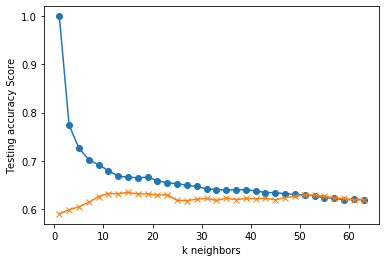

In [17]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
for k in range(1, 64, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train_scaled, y2_train)
    train_score = knn.score(X2_train_scaled, y2_train)
    test_score = knn.score(X2_test_scaled, y2_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 64, 2), train_scores, marker='o')
plt.plot(range(1, 64, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Save the Model

In [24]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X2_train, y2_train)
print('k=15 Test Acc: %.3f' % knn.score(X2_test, y2_test))

k=15 Test Acc: 0.634


In [28]:
knn2 = KNeighborsClassifier(n_neighbors=40)
knn2.fit(X2_train, y2_train)
print('k=23 Test Acc: %.3f' % knn2.score(X2_test, y2_test))

k=23 Test Acc: 0.630


In [29]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'usha4.sav'
joblib.dump(knn, filename)

['usha4.sav']